# Data Analysis Final project:

# Group 46

# Fortune 500

###  Name of students:
Shaked Amsalem<br>
Noy Talala<br>




<a id='top'></a>
<div>
<img src="https://github.com/Shakedams/project1/blob/main/fortune_500.jpg?raw=true" width="800"/>
</div>


---

<b id="Top"> </b>  

1. [Relevant libraries](#1)
2. [Data Information](#2)
3. [Filtering the empty data](#3)
4. [Observations](#4)


---

## Relevent Libraries :
<b id="1"> </b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

---

# Data Information :
#### The Fortune 500 is an annual list compiled and published by Fortune magazine that ranks 500 of the largest United States corporations by total revenue for their respective fiscal years. The list includes publicly held companies, along with privately held companies for which revenues are publicly available. The concept of the Fortune 500 was created by Edgar P. Smith, a Fortune editor, and the first list was published in 1955. Source and for more info [Fortune500](https://en.wikipedia.org/wiki/Fortune_500)<br> 
#### Our data is sourced from the [Kaggle](https://www.kaggle.com/datasets/rm1000/fortune-500-companies) website.
<b id="2"> </b>

## Importing Data :

In [2]:
url = 'https://raw.githubusercontent.com/Shakedams/project1/main/Fortune%20500%20Companies.csv'
fortune_df = pd.read_csv(url)
fortune_df

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [3]:
fortune_df.shape

(13940, 16)

In [4]:
fortune_df.columns

Index(['name', 'rank', 'year', 'industry', 'sector', 'headquarters_state',
       'headquarters_city', 'market_value_mil', 'revenue_mil', 'profit_mil',
       'asset_mil', 'employees', 'founder_is_ceo', 'female_ceo',
       'newcomer_to_fortune_500', 'global_500'],
      dtype='object')

In [5]:
fortune_df.dtypes

name                        object
rank                         int64
year                         int64
industry                    object
sector                      object
headquarters_state          object
headquarters_city           object
market_value_mil           float64
revenue_mil                float64
profit_mil                 float64
asset_mil                  float64
employees                  float64
founder_is_ceo              object
female_ceo                  object
newcomer_to_fortune_500     object
global_500                  object
dtype: object

In [6]:
fortune_df.isnull().sum().sort_values(ascending=False)

global_500                 9940
sector                     9440
employees                  9440
founder_is_ceo             9440
female_ceo                 9440
newcomer_to_fortune_500    9440
market_value_mil           8755
profit_mil                 8443
asset_mil                  8440
headquarters_city          6445
name                          0
rank                          0
year                          0
industry                      0
headquarters_state            0
revenue_mil                   0
dtype: int64

---

## Filtering the empty data
<b id="3"> </b>

In [7]:
fortune_df[fortune_df['year'] < 2015].isnull().sum()

name                          0
rank                          0
year                          0
industry                      0
sector                     9440
headquarters_state            0
headquarters_city          6445
market_value_mil           8502
revenue_mil                   0
profit_mil                 8440
asset_mil                  8440
employees                  9440
founder_is_ceo             9440
female_ceo                 9440
newcomer_to_fortune_500    9440
global_500                 9440
dtype: int64

In [8]:
fortune_df[fortune_df['year'] >= 2015].isnull().sum()

name                         0
rank                         0
year                         0
industry                     0
sector                       0
headquarters_state           0
headquarters_city            0
market_value_mil           253
revenue_mil                  0
profit_mil                   3
asset_mil                    0
employees                    0
founder_is_ceo               0
female_ceo                   0
newcomer_to_fortune_500      0
global_500                 500
dtype: int64

In [9]:
fortune_df = fortune_df[fortune_df['year'] >= 2015]

In [10]:
fortune_df['global_500'].fillna('No data', inplace=True)

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\885621898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fortune_df['global_500'].fillna('No data', inplace=True)


---

# Analysis the effect of the number of employees in the company
<b id="4"> </b>

<a id='top'></a>
<div style="text-align: center;">
    <img src="https://github.com/Shakedams/project1/blob/main/employees-1.jpg?raw=true" width="1000"/>
</div>


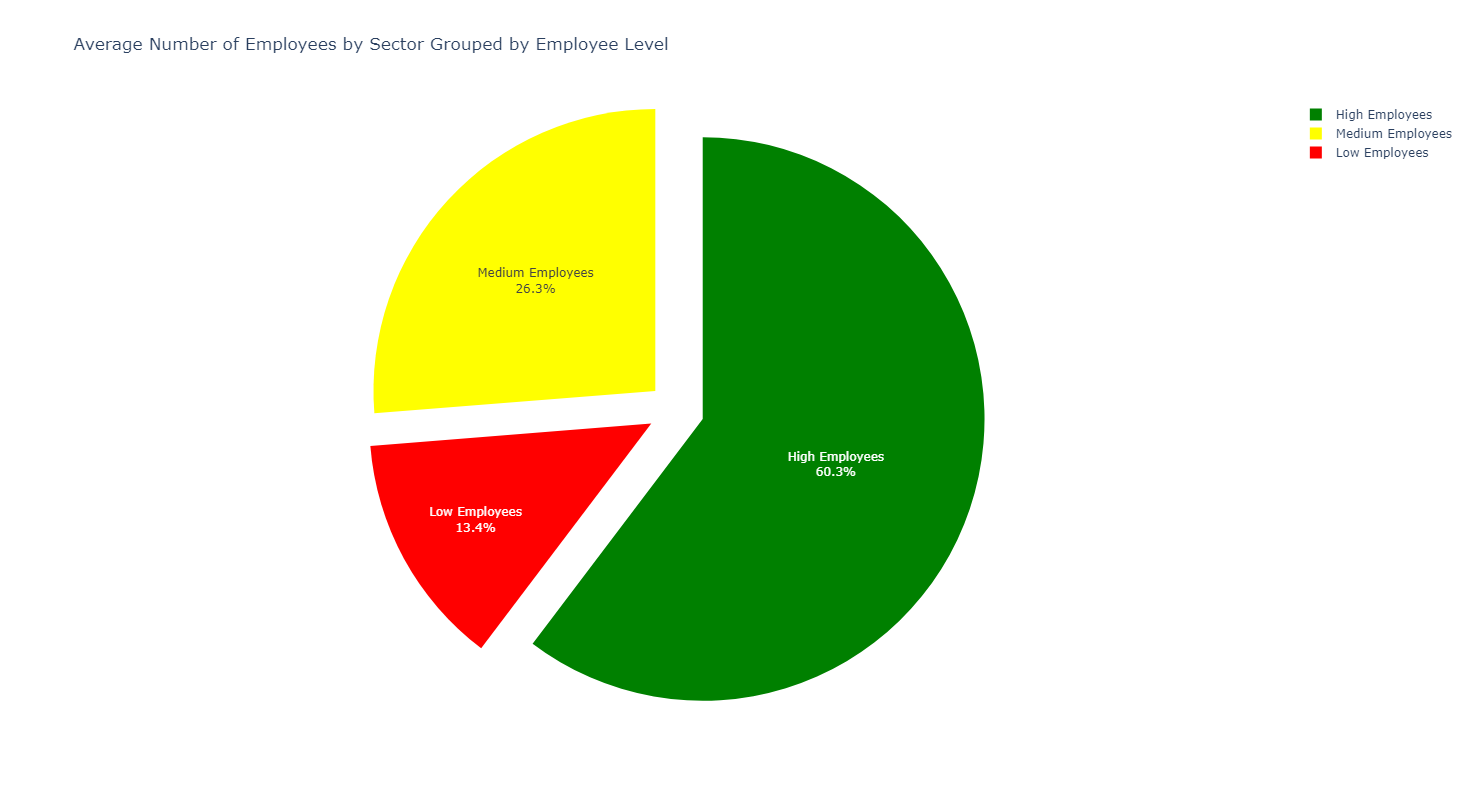

In [30]:
sector_employees = fortune_df.groupby('sector')['employees'].mean().reset_index()
sector_employees['employee_group'] = pd.qcut(sector_employees['employees'], 3, labels=['Low Employees', 'Medium Employees', 'High Employees'])
grouped_data = sector_employees.groupby('employee_group')['employees'].sum().reset_index()
fig = go.Figure(data=[go.Pie(labels=grouped_data['employee_group'], values=grouped_data['employees'], 
                             pull=[0.1, 0.1, 0.1], 
                             marker=dict(colors=['red', 'yellow', 'green']))])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Average Number of Employees by Sector Grouped by Employee Level',
                  height=800, width=1600)  # Adjust the height and width as needed
fig.show()

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\4111362299.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



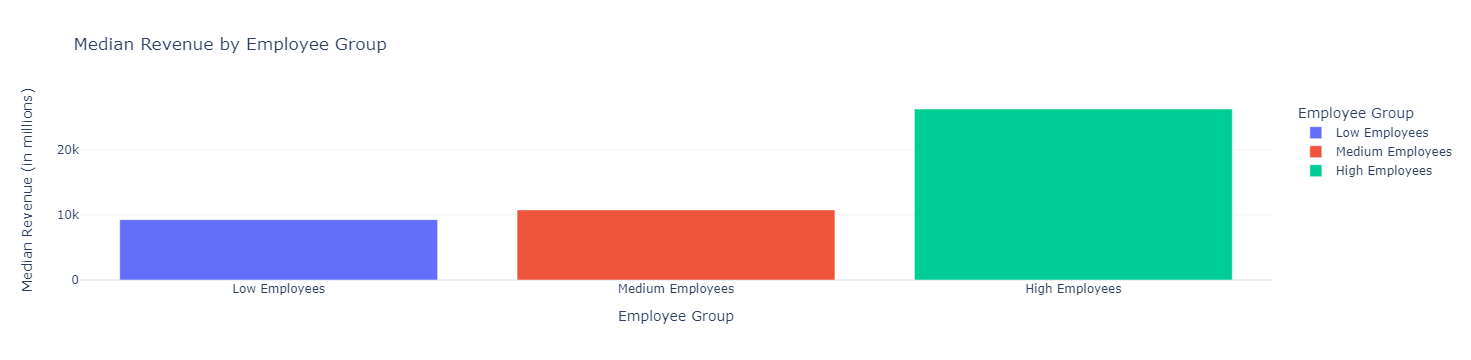

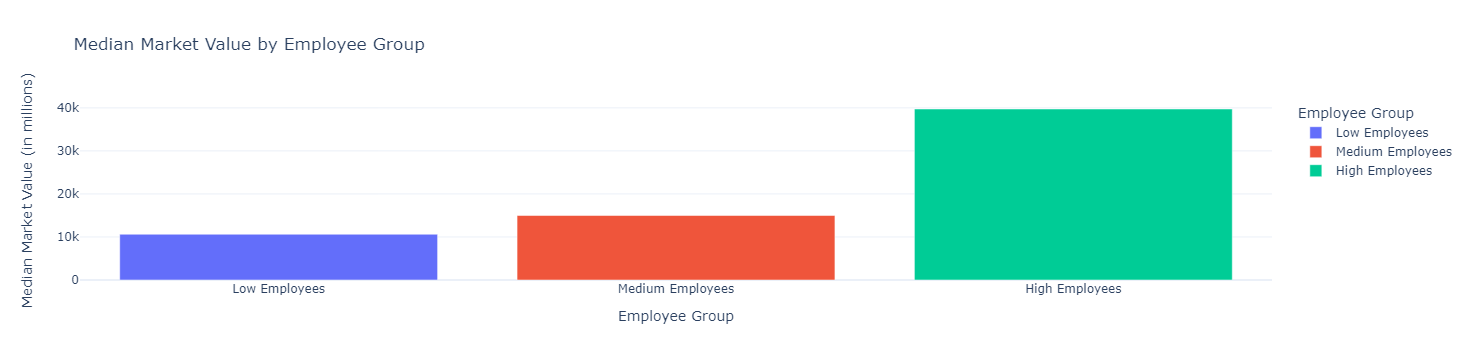

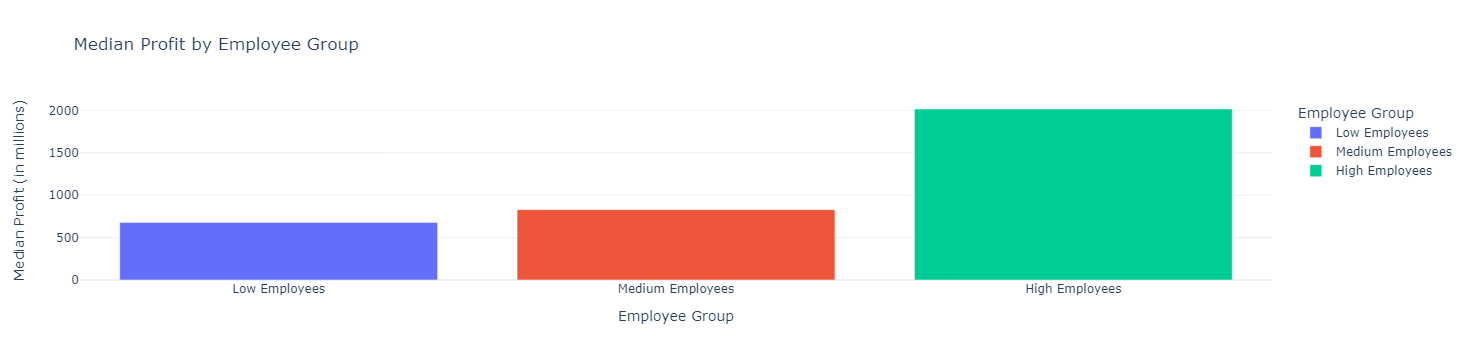

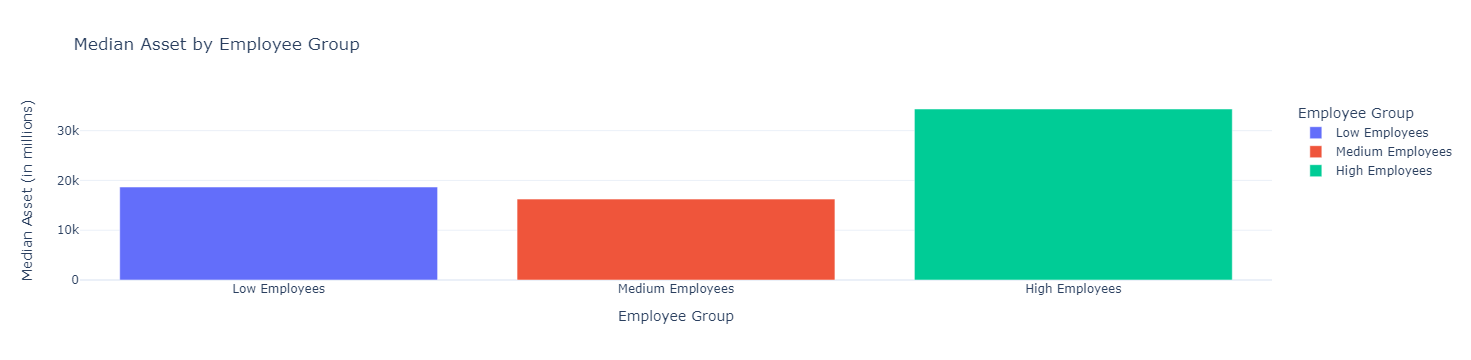

In [23]:
fortune_df['employee_group'] = pd.qcut(fortune_df['employees'], 3, labels=['Low Employees', 'Medium Employees', 'High Employees'])
median_metrics_by_employee_group = fortune_df.groupby('employee_group')[['revenue_mil', 'market_value_mil', 'profit_mil', 'asset_mil']].median().reset_index()

fig_revenue = px.bar(median_metrics_by_employee_group, x='employee_group', y='revenue_mil', color='employee_group', 
                     title='Median Revenue by Employee Group',
                     labels={'revenue_mil': 'Median Revenue (in millions)', 'employee_group': 'Employee Group'},
                     template='plotly_white')
fig_revenue.show()

fig_market_value = px.bar(median_metrics_by_employee_group, x='employee_group', y='market_value_mil', color='employee_group', 
                          title='Median Market Value by Employee Group',
                          labels={'market_value_mil': 'Median Market Value (in millions)', 'employee_group': 'Employee Group'},
                          template='plotly_white')
fig_market_value.show()

fig_profit = px.bar(median_metrics_by_employee_group, x='employee_group', y='profit_mil', color='employee_group', 
                    title='Median Profit by Employee Group',
                    labels={'profit_mil': 'Median Profit (in millions)', 'employee_group': 'Employee Group'},
                    template='plotly_white')
fig_profit.show()

fig_asset = px.bar(median_metrics_by_employee_group, x='employee_group', y='asset_mil', color='employee_group', 
                   title='Median Asset by Employee Group',
                   labels={'asset_mil': 'Median Asset (in millions)', 'employee_group': 'Employee Group'},
                   template='plotly_white')
fig_asset.show()

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\2698598404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



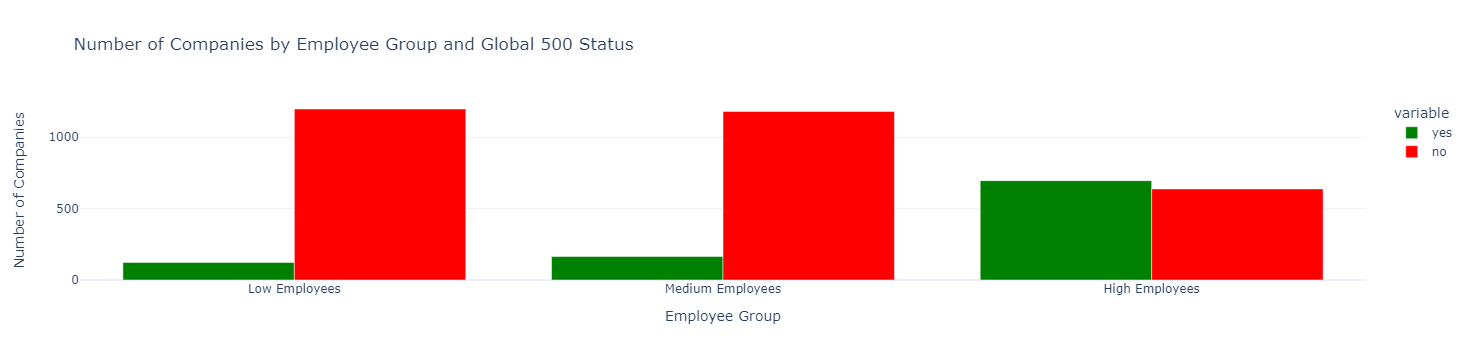

In [27]:
fortune_df['employee_group'] = pd.qcut(fortune_df['employees'], 3, labels=['Low Employees', 'Medium Employees', 'High Employees'])

# Group by employee group and global_500 status and count the number of companies
global_500_by_employee_group = fortune_df.groupby(['employee_group', 'global_500']).size().reset_index(name='count')

# Pivot the table for easier plotting
pivot_table = global_500_by_employee_group.pivot(index='employee_group', columns='global_500', values='count').fillna(0)

# Plot the employee groups by global 500 status
fig = px.bar(pivot_table, x=pivot_table.index, y=['yes', 'no'], 
             title='Number of Companies by Employee Group and Global 500 Status',
             labels={'value': 'Number of Companies', 'employee_group': 'Employee Group'},
             template='plotly_white',
             color_discrete_map={'yes': 'green', 'no': 'red'})

fig.update_layout(barmode='group', xaxis_title='Employee Group', yaxis_title='Number of Companies')
fig.show()

### It can be seen that in companies where the number of employees is higher there are fewer companies included in the Global 500 index and it can be seen that the number of employees has a positive effect on the profitability of the company.

---

# Analysis of the effects of the sex of the company's CEO

<a id='top'></a>
<div style="text-align: center;">
    <img src="https://github.com/Shakedams/project1/blob/main/femaleceo.jpg?raw=true" width="400"/>
</div>


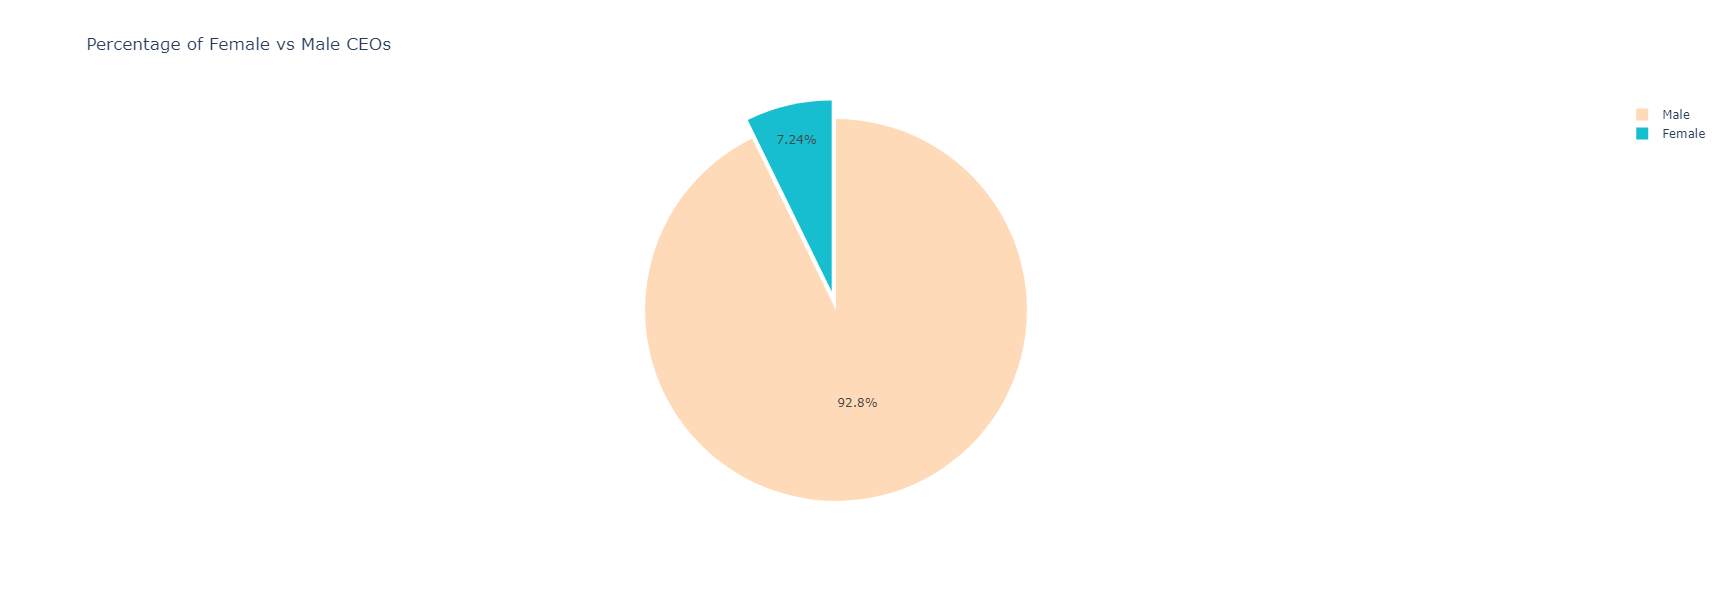

In [14]:
total_ceos = fortune_df['female_ceo'].count()
female_ceos = fortune_df[fortune_df['female_ceo'] == 'yes'].shape[0]
male_ceos = total_ceos - female_ceos
percentage_female_ceos = (female_ceos / total_ceos) * 100
percentage_male_ceos = (male_ceos / total_ceos) * 100

data = pd.DataFrame({
    'CEO Gender': ['Female', 'Male'],
    'Percentage': [percentage_female_ceos, percentage_male_ceos]
})

fig = go.Figure(data=[go.Pie(labels=data['CEO Gender'], values=data['Percentage'], 
                             pull=[0.1, 0],  # Explode the first slice (female CEOs)
                             marker=dict(colors=['#17becf', 'peachpuff']))])

fig.update_layout(title_text='Percentage of Female vs Male CEOs', width=600, height=600)
fig.show()

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\3047983371.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\3047983371.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\3047983371.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

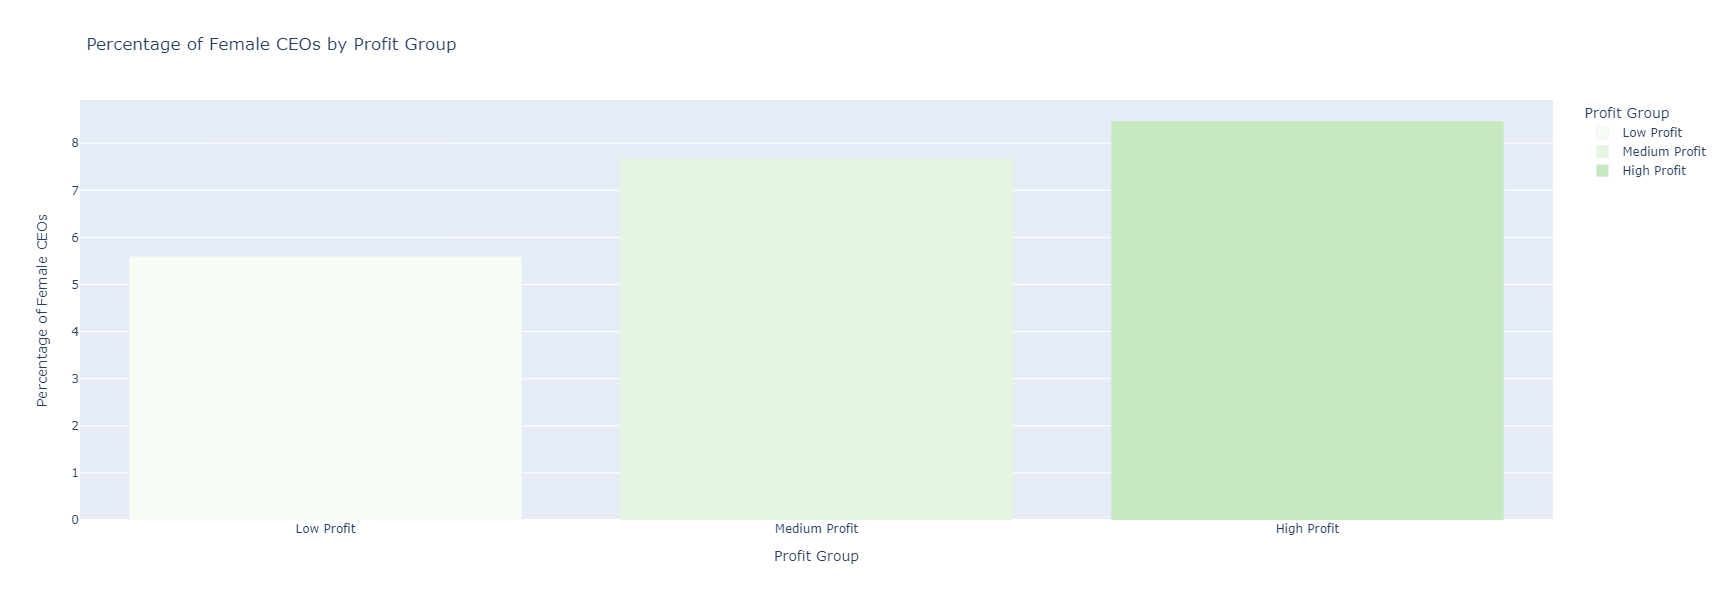

In [15]:
fortune_df['profit_mil'] = pd.to_numeric(fortune_df['profit_mil'], errors='coerce')
fortune_df['female_ceo'] = fortune_df['female_ceo'].fillna('no')

profit_bins = pd.qcut(fortune_df['profit_mil'], 3, labels=['Low Profit', 'Medium Profit', 'High Profit'])

fortune_df['profit_group'] = profit_bins
female_ceo_counts = fortune_df[fortune_df['female_ceo'] == 'yes'].groupby('profit_group').size().reset_index(name='count')

total_ceos = fortune_df.groupby('profit_group')['female_ceo'].count().reset_index(name='total_count')

# Merge the counts with the total counts to calculate percentages
female_ceo_counts = female_ceo_counts.merge(total_ceos, on='profit_group')
female_ceo_counts['percentage'] = (female_ceo_counts['count'] / female_ceo_counts['total_count']) * 100

color_scale = px.colors.sequential.Greens

fig = px.bar(female_ceo_counts, x='profit_group', y='percentage', 
             title='Percentage of Female CEOs by Profit Group',
             labels={'profit_group': 'Profit Group', 'percentage': 'Percentage of Female CEOs'},
             color='profit_group', color_discrete_sequence=color_scale)

fig.update_layout(width=1000, height=600)
fig.show()

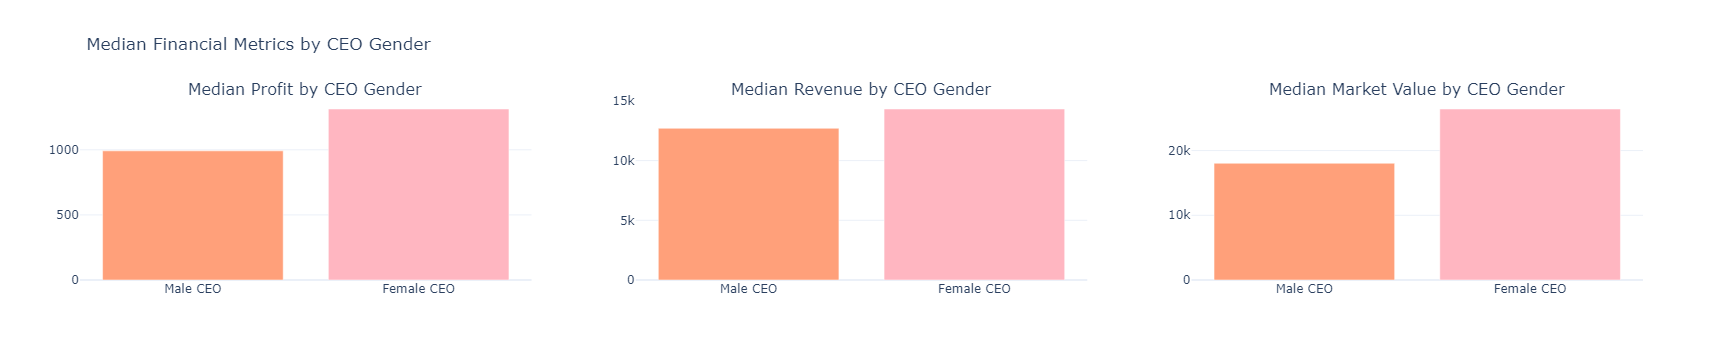

In [16]:
median_values = fortune_df.groupby('female_ceo')[['profit_mil', 'revenue_mil', 'market_value_mil']].median().reset_index()
median_values['female_ceo'] = median_values['female_ceo'].map({'yes': 'Female CEO', 'no': 'Male CEO'})

colors = {'Female CEO': 'lightpink', 'Male CEO': 'lightsalmon'}
fig = make_subplots(rows=1, cols=3, subplot_titles=('Median Profit by CEO Gender', 'Median Revenue by CEO Gender', 'Median Market Value by CEO Gender'))

fig.add_trace(go.Bar(
    x=median_values['female_ceo'],
    y=median_values['profit_mil'],
    name='Median Profit',
    marker_color=[colors[gender] for gender in median_values['female_ceo']]
), row=1, col=1)

fig.add_trace(go.Bar(
    x=median_values['female_ceo'],
    y=median_values['revenue_mil'],
    name='Median Revenue',
    marker_color=[colors[gender] for gender in median_values['female_ceo']]
), row=1, col=2)

fig.add_trace(go.Bar(
    x=median_values['female_ceo'],
    y=median_values['market_value_mil'],
    name='Median Market Value',
    marker_color=[colors[gender] for gender in median_values['female_ceo']]
), row=1, col=3)

fig.update_layout(title_text='Median Financial Metrics by CEO Gender',
                  showlegend=False, template='plotly_white')

fig.show()

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\465965000.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



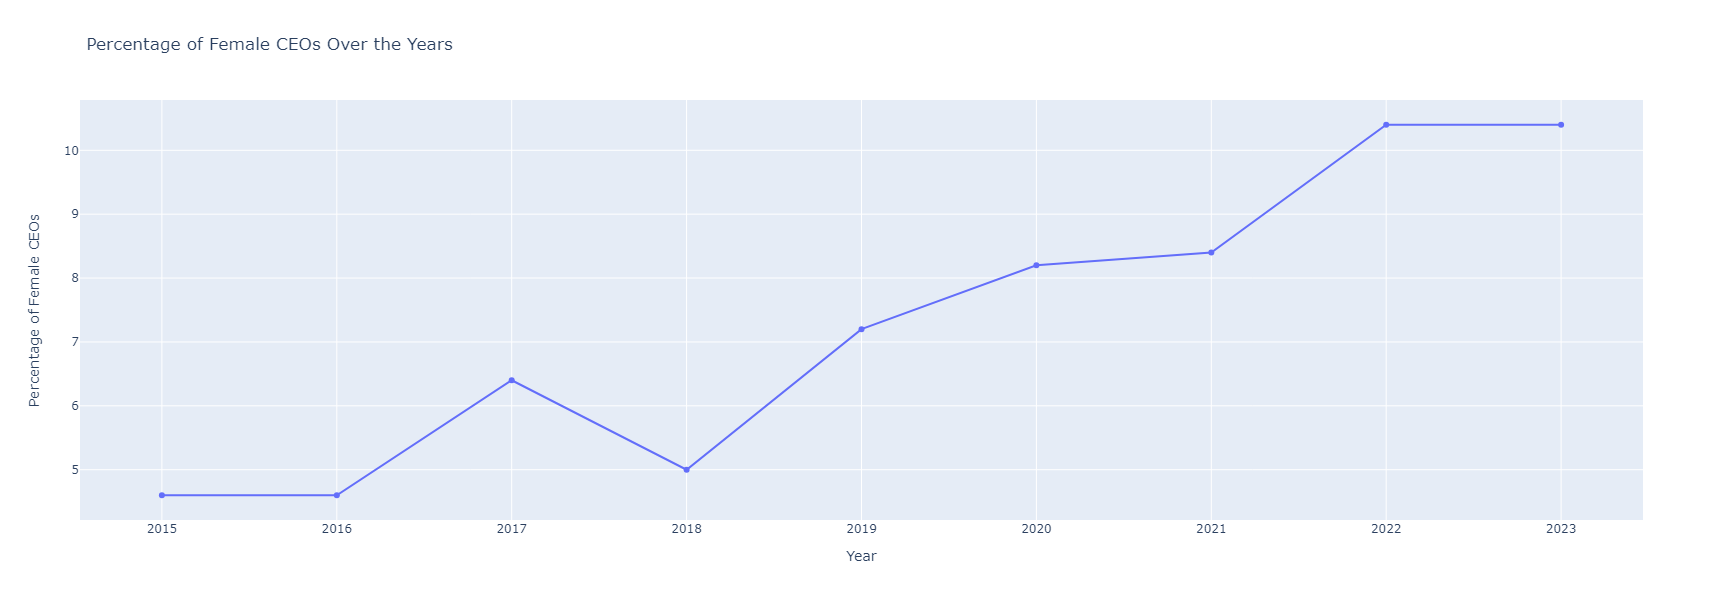

In [17]:
fortune_df['female_ceo'] = fortune_df['female_ceo'].fillna('no')
female_ceo_counts_by_year = fortune_df[fortune_df['female_ceo'] == 'yes'].groupby('year').size().reset_index(name='female_ceo_count')
total_ceo_counts_by_year = fortune_df.groupby('year').size().reset_index(name='total_ceo_count')
ceo_counts_by_year = pd.merge(female_ceo_counts_by_year, total_ceo_counts_by_year, on='year')
ceo_counts_by_year['percentage'] = (ceo_counts_by_year['female_ceo_count'] / ceo_counts_by_year['total_ceo_count']) * 100

fig = px.line(ceo_counts_by_year, x='year', y='percentage', 
              title='Percentage of Female CEOs Over the Years',
              labels={'year': 'Year', 'percentage': 'Percentage of Female CEOs'},
              markers=True)

fig.update_layout(width=1400, height=600)
fig.show()

### According to the graphs we presented, it can be seen that when the CEO is female, the company's financial indicators tend to be higher than when the CEO is male. And this will explain the increase in the percentage of females serving as CEO every year.

---

# Analysis of the newcomer companies odds to remain in Fortune 500 the following year

<a id='top'></a>
<div style="text-align: center;">
    <img src="https://github.com/Shakedams/project1/blob/main/newcomer.jpg?raw=true" width="800"/>
</div>

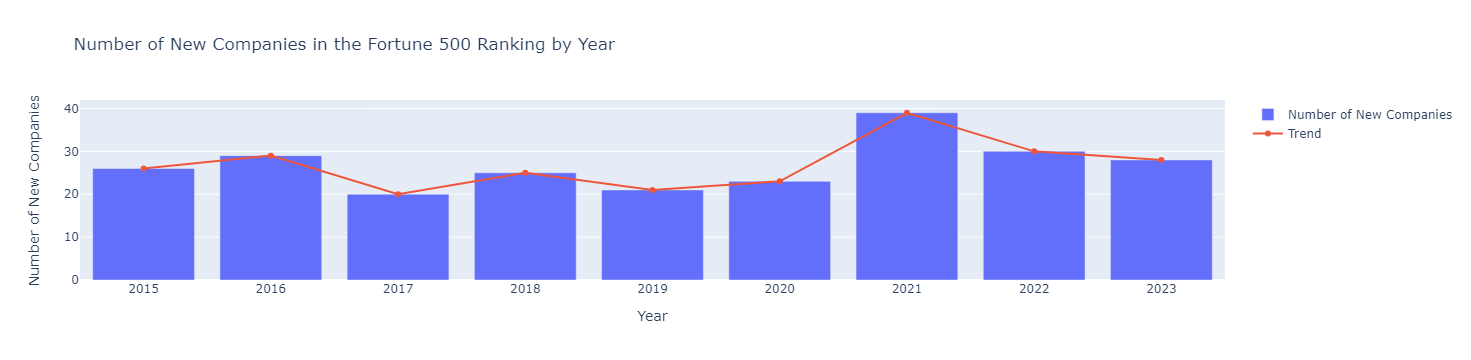

In [53]:
newcomers_by_year = fortune_df[fortune_df['newcomer_to_fortune_500'] == 'yes'].groupby('year')['name'].count().reset_index()
newcomers_by_year.columns = ['year', 'newcomer_count']

fig_newcomers_combined = go.Figure()
fig_newcomers_combined.add_trace(go.Bar(x=newcomers_by_year['year'], y=newcomers_by_year['newcomer_count'], name='Number of New Companies'))
fig_newcomers_combined.add_trace(go.Scatter(x=newcomers_by_year['year'], y=newcomers_by_year['newcomer_count'], mode='lines+markers', name='Trend'))

fig_newcomers_combined.update_layout(title='Number of New Companies in the Fortune 500 Ranking by Year',
                                     xaxis_title='Year',
                                     yaxis_title='Number of New Companies')

fig_newcomers_combined.show()

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\1294572984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\1294572984.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



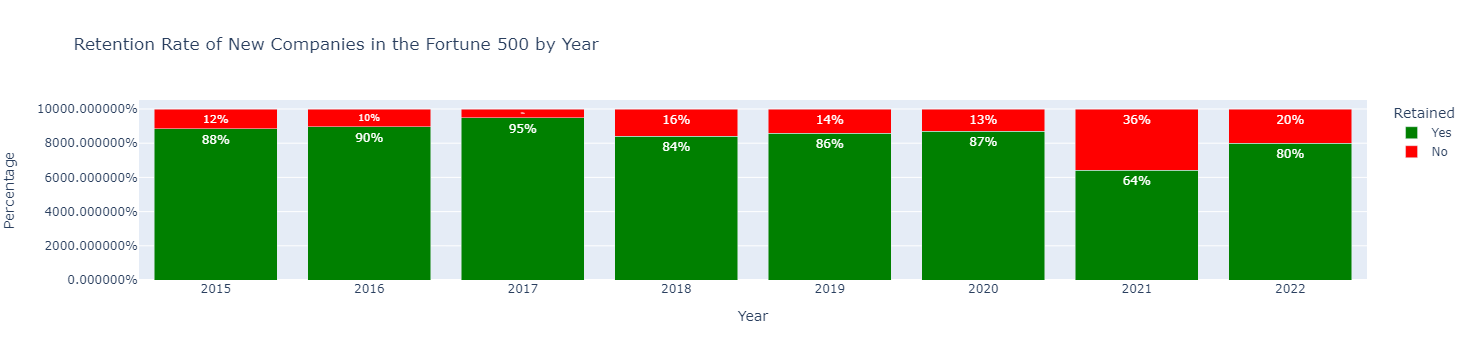

In [45]:
fortune_df['newcomer_to_fortune_500'] = fortune_df['newcomer_to_fortune_500'].fillna('no')
fortune_df['next_year'] = fortune_df['year'] + 1
retention_df = pd.merge(fortune_df, fortune_df, left_on=['name', 'next_year'], right_on=['name', 'year'], how='left', suffixes=('', '_next'))
retention_df['retained'] = retention_df['year_next'].notna()
retention_counts = retention_df[retention_df['newcomer_to_fortune_500'] == 'yes'].groupby(['year', 'retained']).size().reset_index(name='count')
retention_counts = retention_counts[retention_counts['year'] < 2023]
total_counts = retention_counts.groupby('year')['count'].transform('sum')
retention_counts['percentage'] = retention_counts['count'] / total_counts * 100
retention_counts['retained'] = retention_counts['retained'].map({True: 'Yes', False: 'No'})

fig_retention = px.bar(
    retention_counts,
    x='year',
    y='percentage',
    color='retained',
    category_orders={'retained': ['Yes', 'No']},
    title='Retention Rate of New Companies in the Fortune 500 by Year',
    labels={'year': 'Year', 'percentage': 'Percentage', 'retained': 'Retained'},
    color_discrete_map={'Yes': 'green', 'No': 'red'},
    text='percentage'
)

fig_retention.update_traces(
    texttemplate='%{text:.0f}%',  # Round percentages to whole numbers
    textposition='inside'
)
fig_retention.update_layout(
    barmode='stack',
    yaxis_tickformat='%'
)

fig_retention.show()

#### Remaining percentage of a company in the index for the following year

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\3339447975.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\3339447975.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



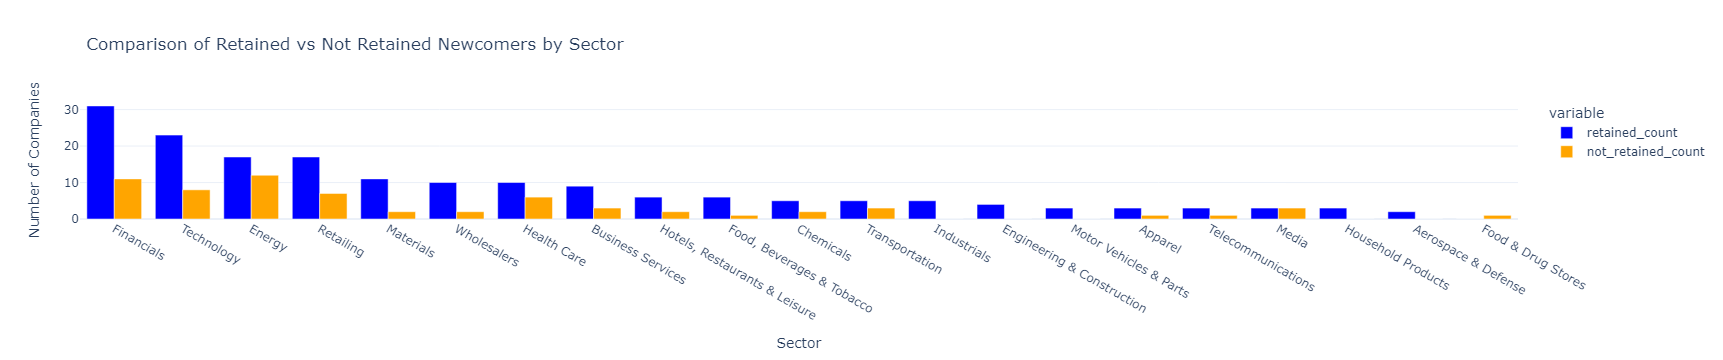

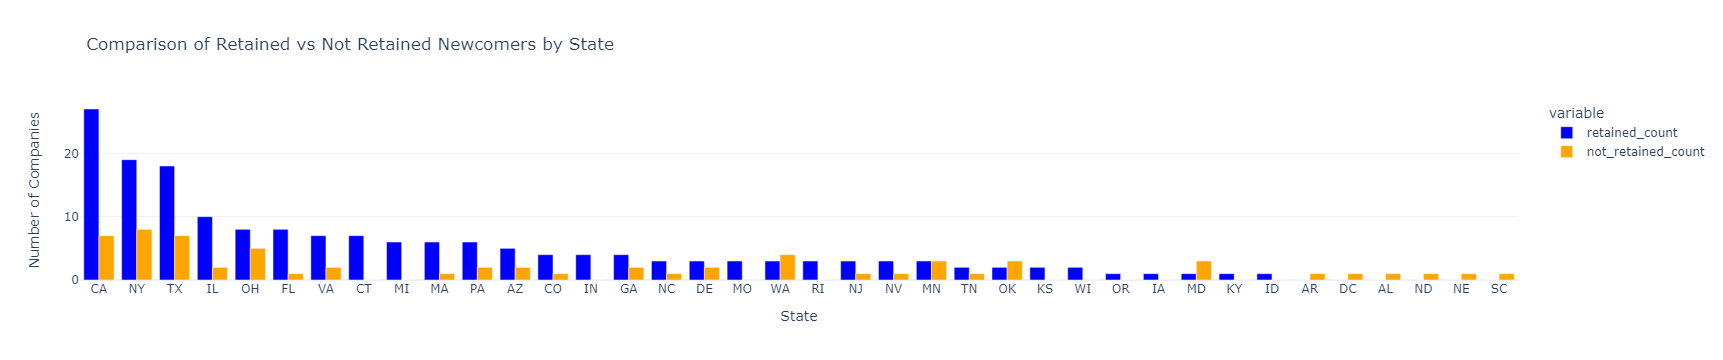

In [20]:
fortune_df['newcomer_to_fortune_500'] = fortune_df['newcomer_to_fortune_500'].fillna('no')
fortune_df['next_year'] = fortune_df['year'] + 1

# Merge the DataFrame with itself to find retention
retention_df = pd.merge(fortune_df, fortune_df, left_on=['name', 'next_year'], right_on=['name', 'year'], how='left', suffixes=('', '_next'))
retention_df['retained'] = retention_df['year_next'].notna()

# Filter for newcomers and group by retention status
newcomers = retention_df[retention_df['newcomer_to_fortune_500'] == 'yes']
retained_newcomers = newcomers[newcomers['retained']]
not_retained_newcomers = newcomers[~newcomers['retained']]

# Calculate the number of retained and not retained newcomers by sector
sector_retained = retained_newcomers['sector'].value_counts().reset_index()
sector_retained.columns = ['sector', 'retained_count']
sector_not_retained = not_retained_newcomers['sector'].value_counts().reset_index()
sector_not_retained.columns = ['sector', 'not_retained_count']

# Merge the data for sectors
sector_comparison = pd.merge(sector_retained, sector_not_retained, on='sector', how='outer').fillna(0)

# Plot the comparison of sectors
fig_sector = px.bar(sector_comparison, x='sector', y=['retained_count', 'not_retained_count'], barmode='group',
                    title='Comparison of Retained vs Not Retained Newcomers by Sector',
                    labels={'value': 'Number of Companies', 'sector': 'Sector'},
                    template='plotly_white',
                    color_discrete_map={'retained_count': 'blue', 'not_retained_count': 'orange'})
fig_sector.show()

# Calculate the number of retained and not retained newcomers by state
state_retained = retained_newcomers['headquarters_state'].value_counts().reset_index()
state_retained.columns = ['headquarters_state', 'retained_count']
state_not_retained = not_retained_newcomers['headquarters_state'].value_counts().reset_index()
state_not_retained.columns = ['headquarters_state', 'not_retained_count']

# Merge the data for states
state_comparison = pd.merge(state_retained, state_not_retained, on='headquarters_state', how='outer').fillna(0)

# Plot the comparison of states
fig_state = px.bar(state_comparison, x='headquarters_state', y=['retained_count', 'not_retained_count'], barmode='group',
                   title='Comparison of Retained vs Not Retained Newcomers by State',
                   labels={'value': 'Number of Companies', 'headquarters_state': 'State'},
                   template='plotly_white',
                   color_discrete_map={'retained_count': 'blue', 'not_retained_count': 'orange'})
fig_state.show()

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\3822681237.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shake\AppData\Local\Temp\ipykernel_26496\3822681237.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



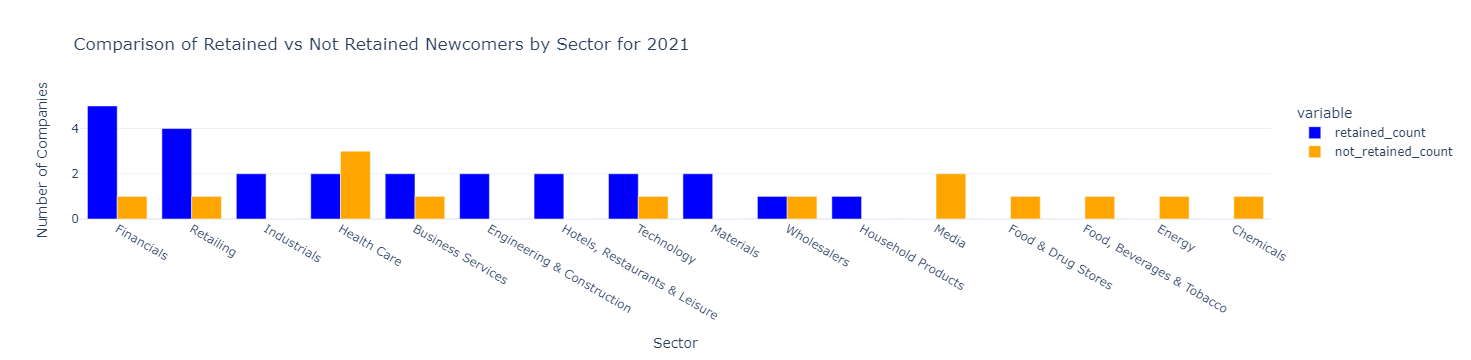

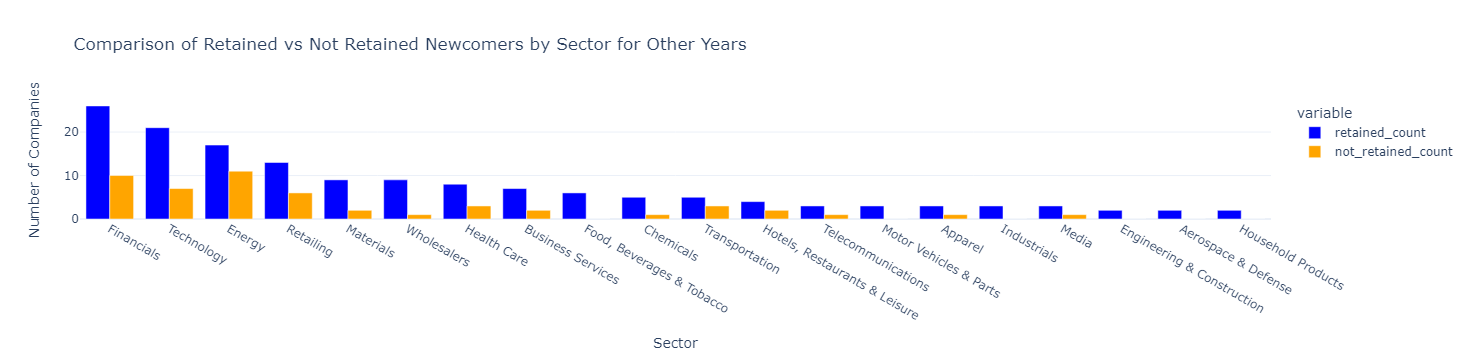

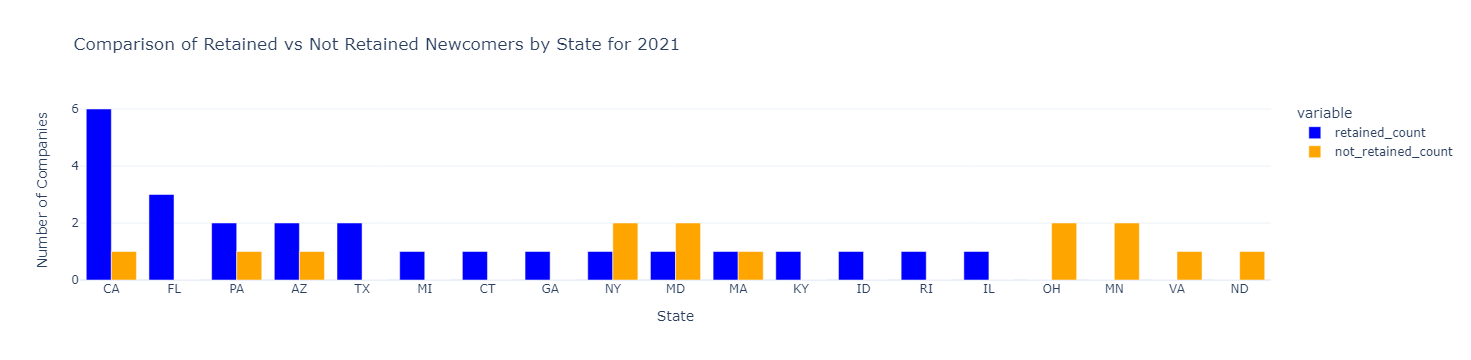

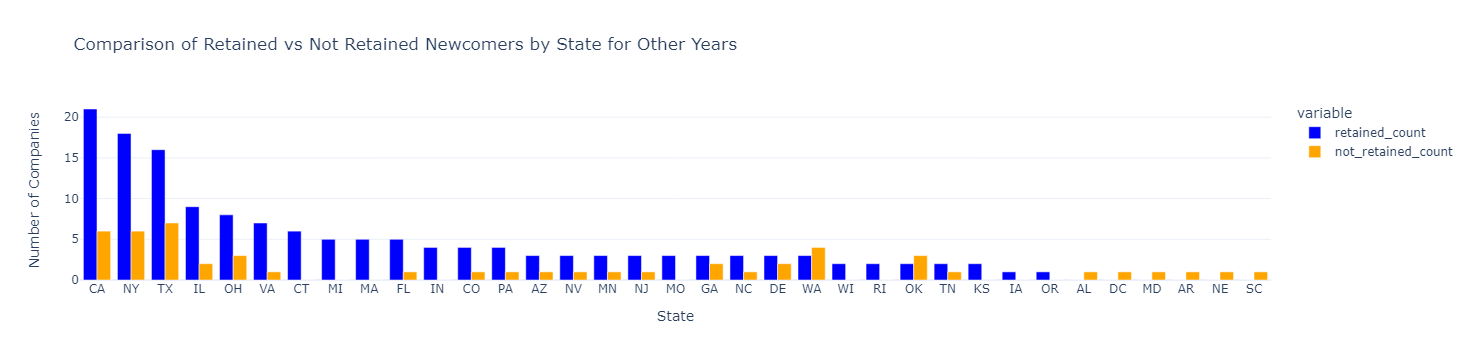

In [47]:
fortune_df['newcomer_to_fortune_500'] = fortune_df['newcomer_to_fortune_500'].fillna('no')
fortune_df['next_year'] = fortune_df['year'] + 1
retention_df = pd.merge(fortune_df, fortune_df, left_on=['name', 'next_year'], right_on=['name', 'year'], how='left', suffixes=('', '_next'))
retention_df['retained'] = retention_df['year_next'].notna()
newcomers_2021 = retention_df[(retention_df['newcomer_to_fortune_500'] == 'yes') & (retention_df['year'] == 2021)]
newcomers_other_years = retention_df[(retention_df['newcomer_to_fortune_500'] == 'yes') & (retention_df['year'] != 2021)]
def calculate_retention_counts(data):
    retained = data[data['retained']]
    not_retained = data[~data['retained']]
    
    sector_retained = retained['sector'].value_counts().reset_index()
    sector_retained.columns = ['sector', 'retained_count']
    sector_not_retained = not_retained['sector'].value_counts().reset_index()
    sector_not_retained.columns = ['sector', 'not_retained_count']
    sector_comparison = pd.merge(sector_retained, sector_not_retained, on='sector', how='outer').fillna(0)
    
    state_retained = retained['headquarters_state'].value_counts().reset_index()
    state_retained.columns = ['headquarters_state', 'retained_count']
    state_not_retained = not_retained['headquarters_state'].value_counts().reset_index()
    state_not_retained.columns = ['headquarters_state', 'not_retained_count']
    state_comparison = pd.merge(state_retained, state_not_retained, on='headquarters_state', how='outer').fillna(0)
    
    return sector_comparison, state_comparison

sector_comparison_2021, state_comparison_2021 = calculate_retention_counts(newcomers_2021)
sector_comparison_other, state_comparison_other = calculate_retention_counts(newcomers_other_years)

fig_sector_2021 = px.bar(sector_comparison_2021, x='sector', y=['retained_count', 'not_retained_count'], barmode='group',
                         title='Comparison of Retained vs Not Retained Newcomers by Sector for 2021',
                         labels={'value': 'Number of Companies', 'sector': 'Sector'},
                         template='plotly_white',
                         color_discrete_map={'retained_count': 'blue', 'not_retained_count': 'orange'})
fig_sector_2021.show()

fig_sector_other = px.bar(sector_comparison_other, x='sector', y=['retained_count', 'not_retained_count'], barmode='group',
                          title='Comparison of Retained vs Not Retained Newcomers by Sector for Other Years',
                          labels={'value': 'Number of Companies', 'sector': 'Sector'},
                          template='plotly_white',
                          color_discrete_map={'retained_count': 'blue', 'not_retained_count': 'orange'})
fig_sector_other.show()

fig_state_2021 = px.bar(state_comparison_2021, x='headquarters_state', y=['retained_count', 'not_retained_count'], barmode='group',
                        title='Comparison of Retained vs Not Retained Newcomers by State for 2021',
                        labels={'value': 'Number of Companies', 'headquarters_state': 'State'},
                        template='plotly_white',
                        color_discrete_map={'retained_count': 'blue', 'not_retained_count': 'orange'})
fig_state_2021.show()

fig_state_other = px.bar(state_comparison_other, x='headquarters_state', y=['retained_count', 'not_retained_count'], barmode='group',
                         title='Comparison of Retained vs Not Retained Newcomers by State for Other Years',
                         labels={'value': 'Number of Companies', 'headquarters_state': 'State'},
                         template='plotly_white',
                         color_discrete_map={'retained_count': 'blue', 'not_retained_count': 'orange'})
fig_state_other.show()

### You can see the percentages of a company that entered the Fortune 500 index to remain in it the year after and the characteristics that characterize those who remained versus those who dropped from the index.

---